Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

Plot bar charts showing impact of employee salaries on retention

Plot bar charts showing corelation between department and employee retention

Now build logistic regression model using variables that were narrowed down in step 1

Measure the accuracy of the model

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('HR_comma_sep.csv')

In [3]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
data.shape

(14999, 10)

In [5]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
df=data.apply(LabelEncoder().fit_transform)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,29,17,0,61,1,0,1,0,7,1
1,71,50,3,166,4,0,1,0,7,2
2,2,52,5,176,2,0,1,0,7,2
3,63,51,3,127,3,0,1,0,7,1
4,28,16,0,63,1,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,31,21,0,55,1,0,1,0,8,1
14995,28,12,0,64,1,0,1,0,8,1
14996,28,17,0,47,1,0,1,0,8,1
14997,2,60,4,184,2,0,1,0,8,1


Text(0, 0.5, 'Salary')

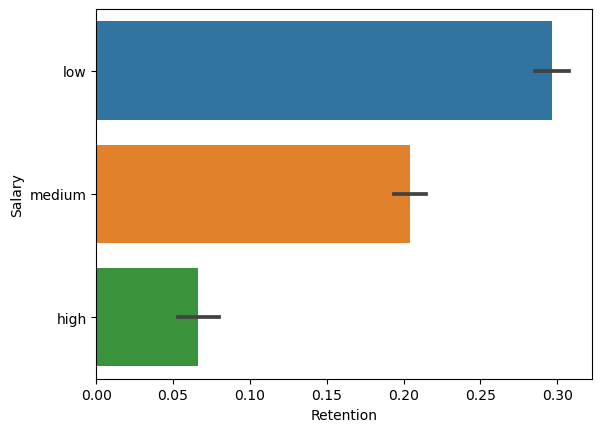

In [7]:
import seaborn as sns
sns.barplot(x=data['left'],y=data['salary'])
plt.xlabel('Retention')
plt.ylabel('Salary')

In [8]:
sns.set(rc = {"figure.figsize": (12,8), "figure.dpi" : 300})

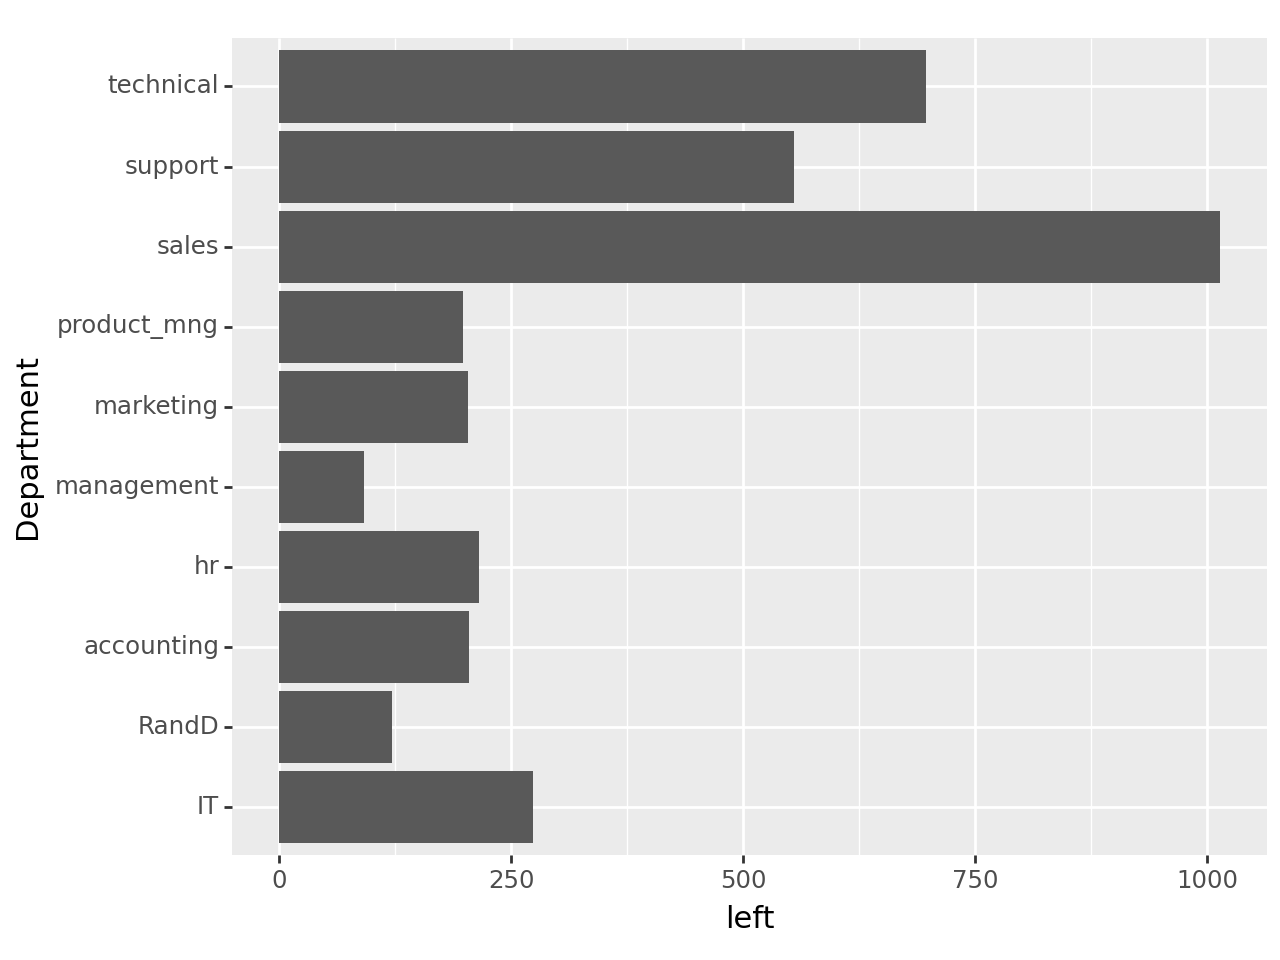

<Figure Size: (640 x 480)>

In [41]:
from plotnine import ggplot, aes,geom_bar,coord_flip
ggplot(data)+aes(x="Department",y='left')+geom_bar(stat = "identity")+coord_flip()

<Axes: ylabel='left'>

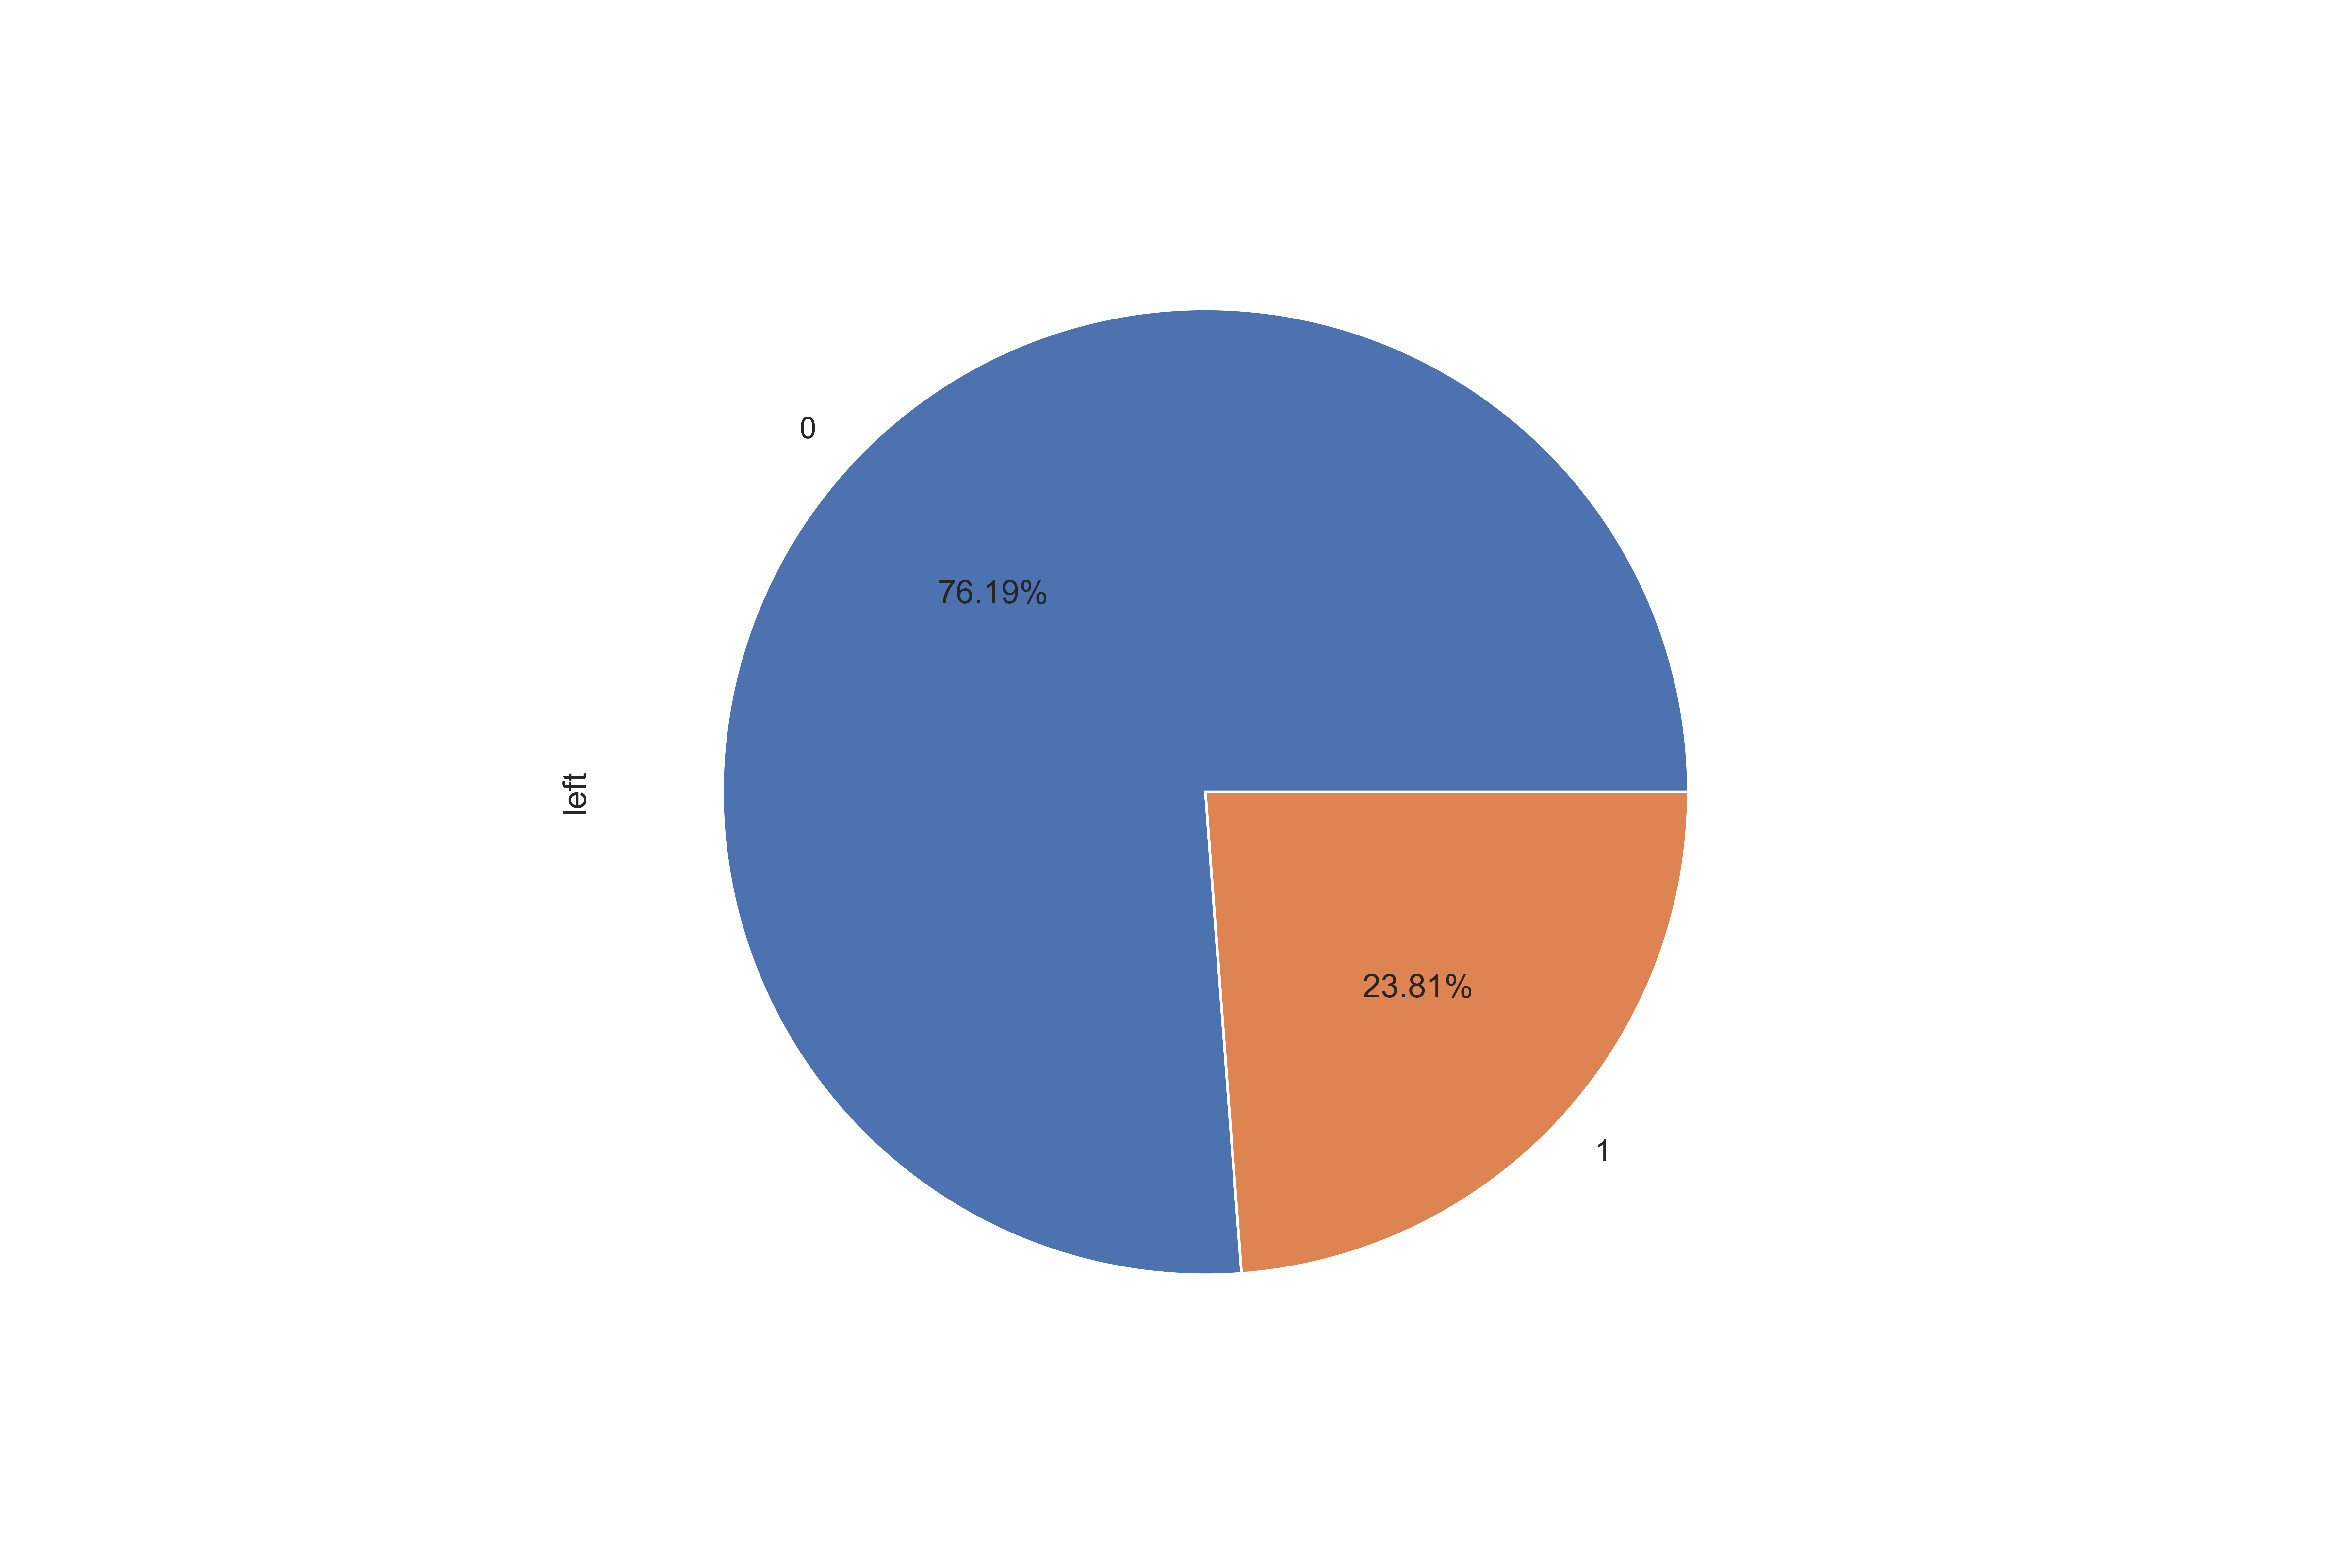

In [10]:
cls=data.left.value_counts()
cls.plot(kind='pie',autopct='%.2f%%')

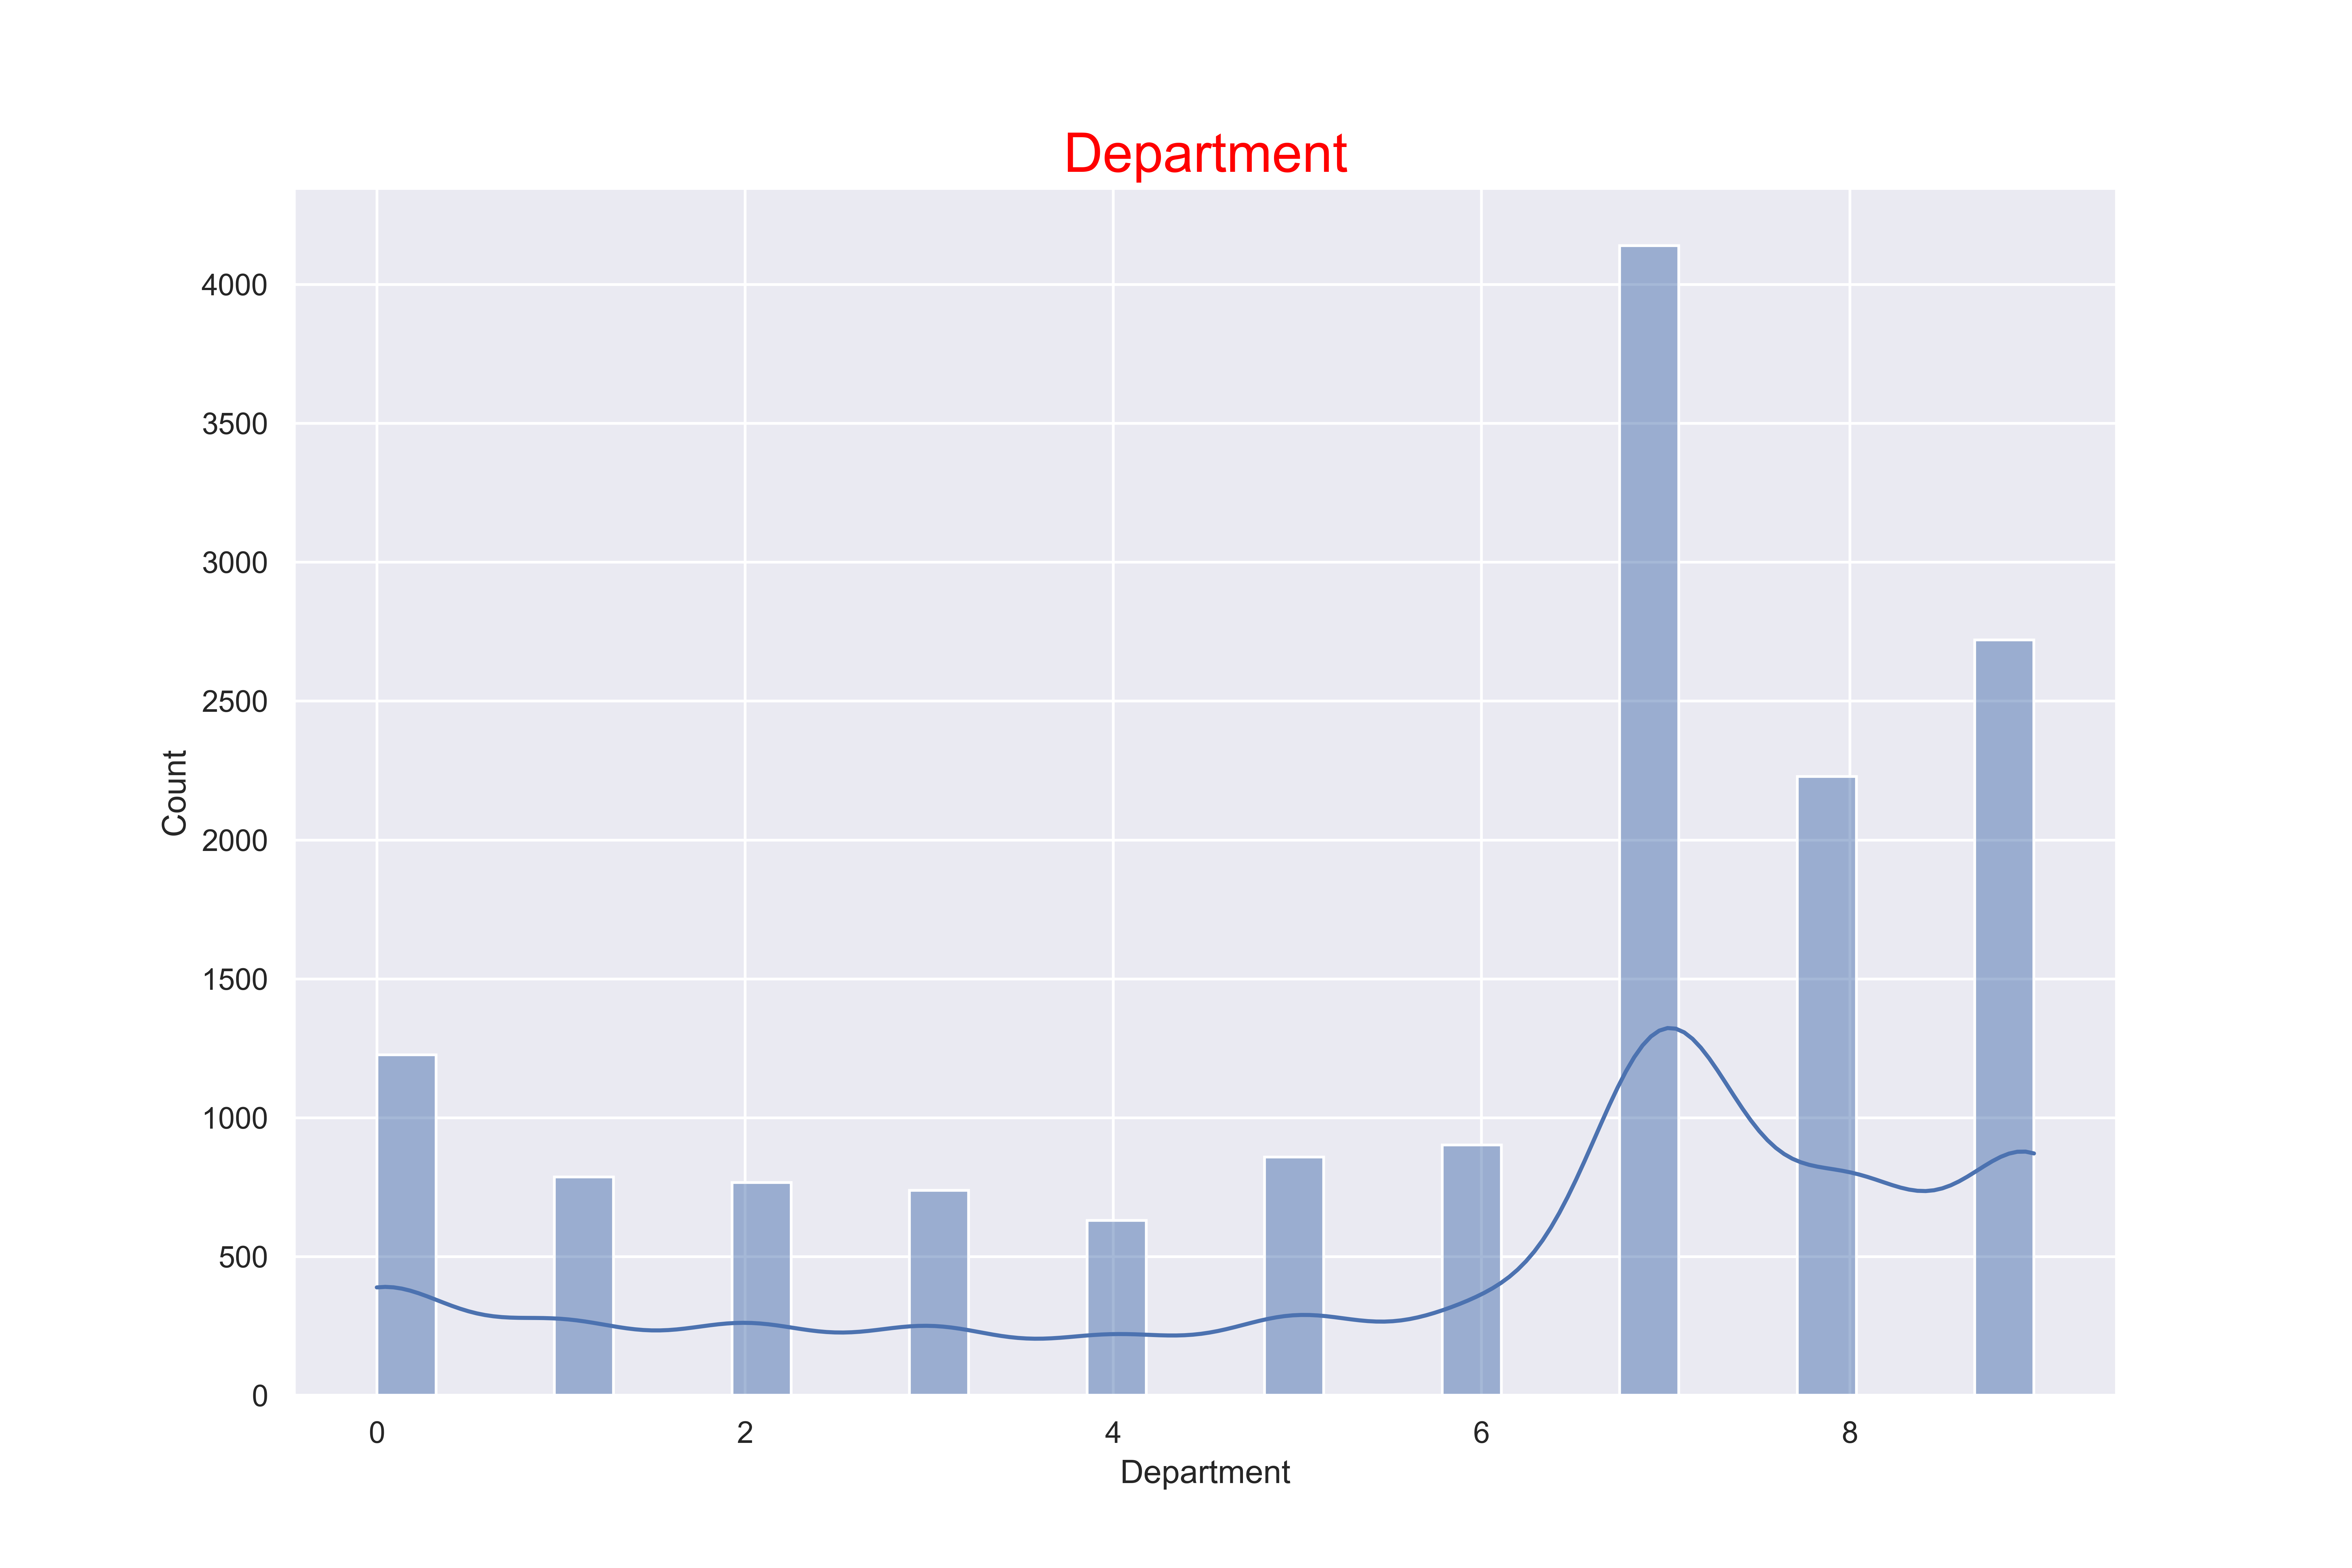

In [11]:
sns.histplot(x='Department',data=df,kde=True)
plt.title('Department',size=20,color='red');

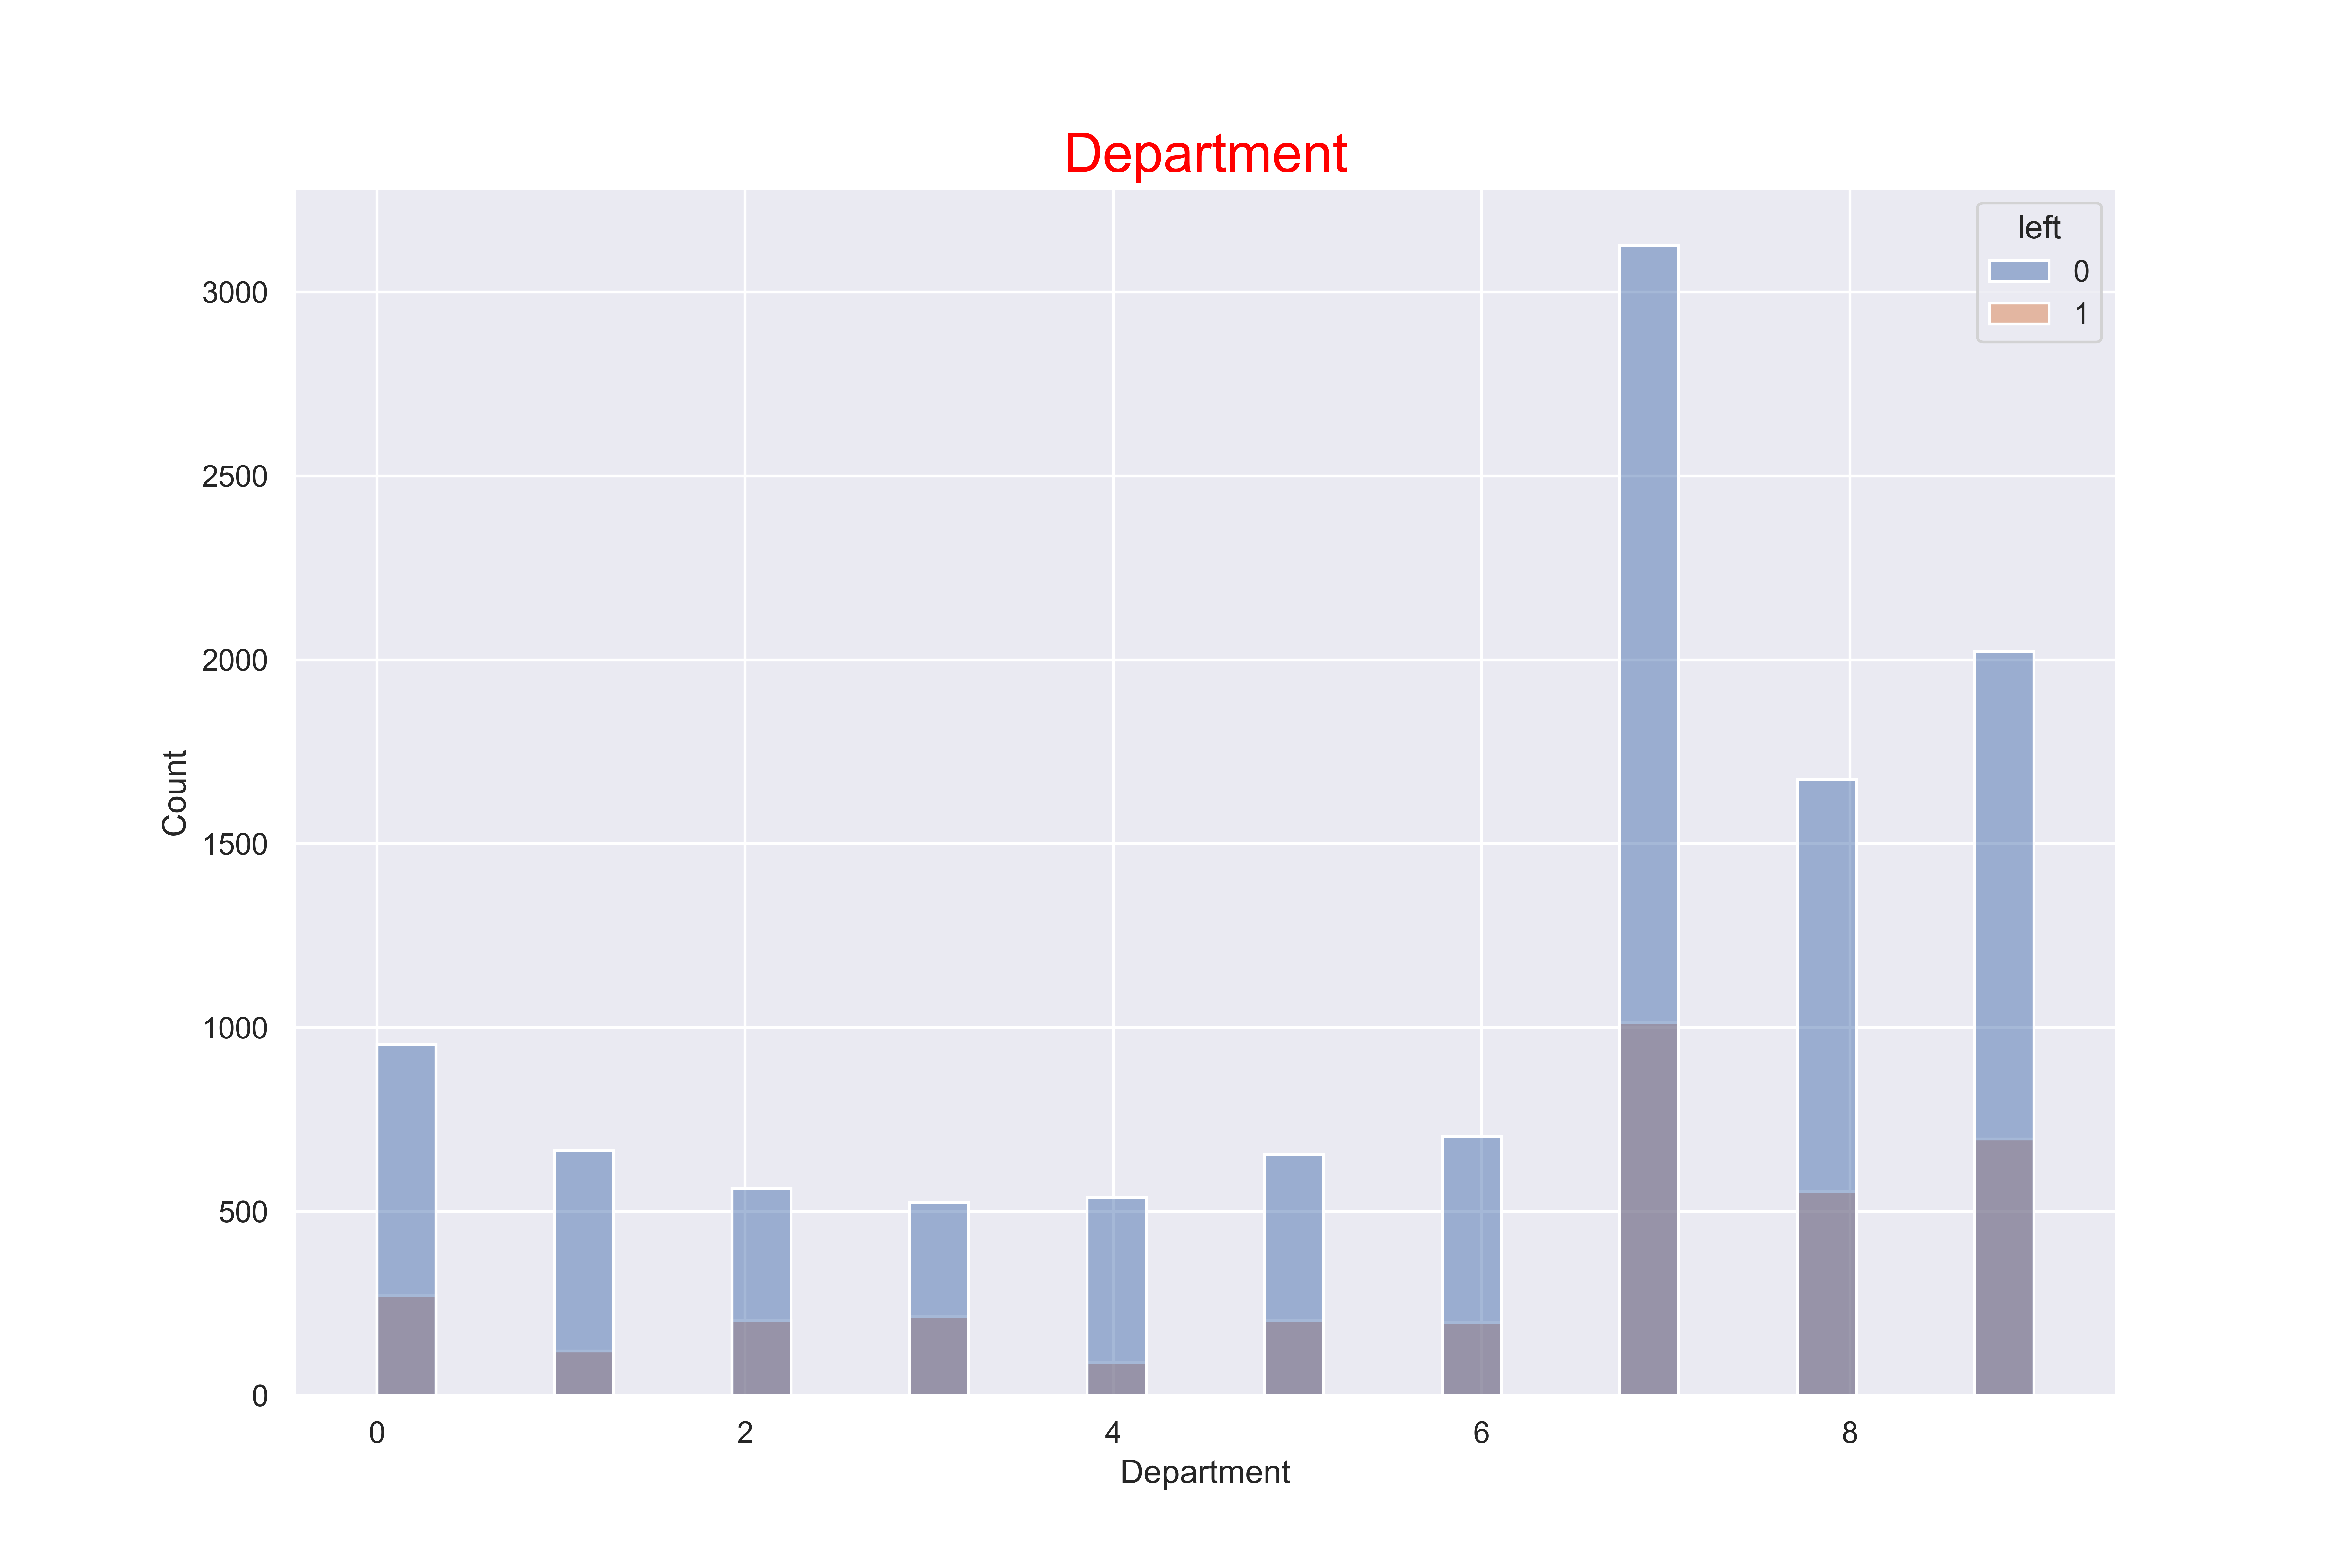

In [12]:
sns.histplot(x='Department',data=df,hue='left')
plt.title('Department',size=20,color='red');

In [13]:
x=df.drop(['left'],axis='columns')
y=df['left']

In [14]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,29,17,0,61,1,0,0,7,1
1,71,50,3,166,4,0,0,7,2
2,2,52,5,176,2,0,0,7,2
3,63,51,3,127,3,0,0,7,1
4,28,16,0,63,1,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,31,21,0,55,1,0,0,8,1
14995,28,12,0,64,1,0,0,8,1
14996,28,17,0,47,1,0,0,8,1
14997,2,60,4,184,2,0,0,8,1


In [15]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [38]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
13314,68,45,2,68,1,0,0,9,0
6361,57,26,3,118,0,0,0,7,2
5352,80,33,2,41,1,0,0,7,2
2471,44,33,2,120,0,0,0,3,1
13093,85,23,2,145,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...
9825,78,34,1,128,1,0,0,8,1
3096,62,30,1,142,0,0,0,9,1
12627,32,10,0,60,1,1,0,7,1
9040,55,16,2,175,0,1,0,3,2


In [39]:
y_train

13314    0
6361     0
5352     0
2471     0
13093    0
        ..
9825     0
3096     0
12627    1
9040     0
11854    0
Name: left, Length: 11999, dtype: int64

In [22]:
y_predict=model.predict(x_test)
y_predict

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
model.score(x_test,y_test)

0.758

In [24]:
model.predict_proba(x_test)

array([[0.46711953, 0.53288047],
       [0.29595108, 0.70404892],
       [0.83340857, 0.16659143],
       ...,
       [0.91238035, 0.08761965],
       [0.89081336, 0.10918664],
       [0.78553693, 0.21446307]])

In [25]:
model.coef_

array([[-0.0410113 ,  0.00663401, -0.3160837 ,  0.00469767,  0.24470824,
        -1.53396534, -0.33774418,  0.04242977,  0.02722329]])

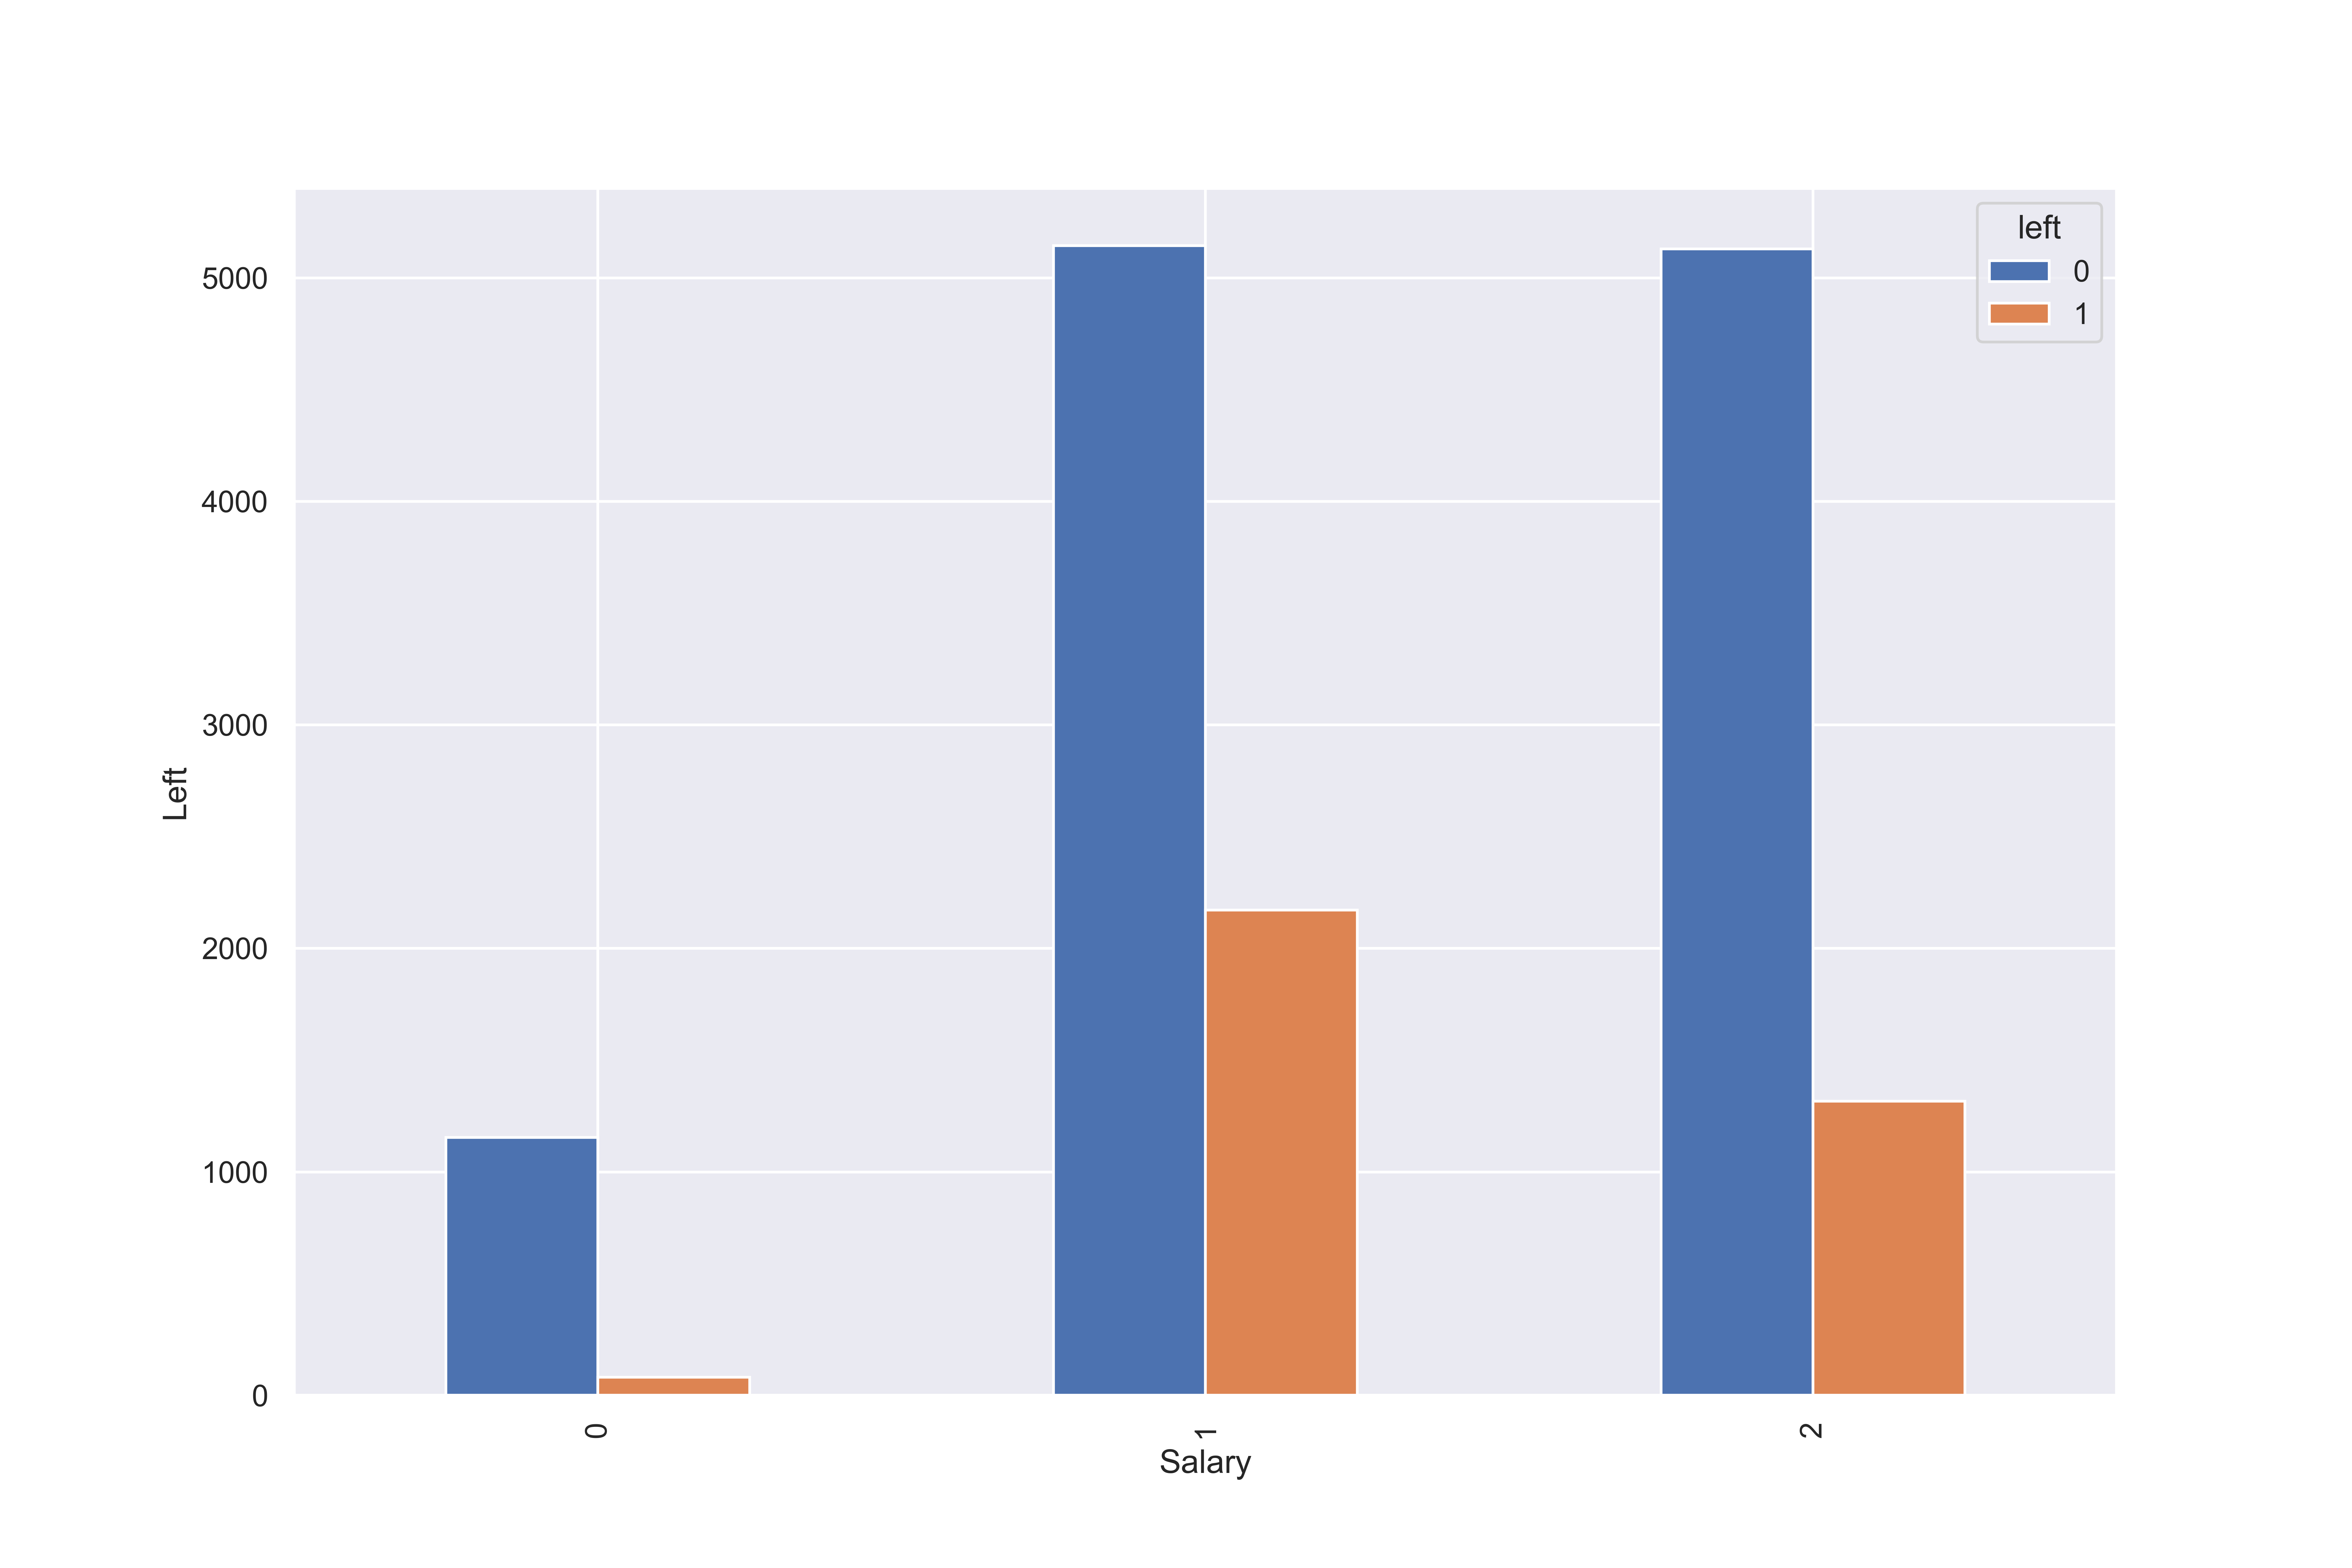

In [40]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.xlabel('Salary')
plt.ylabel('Left');

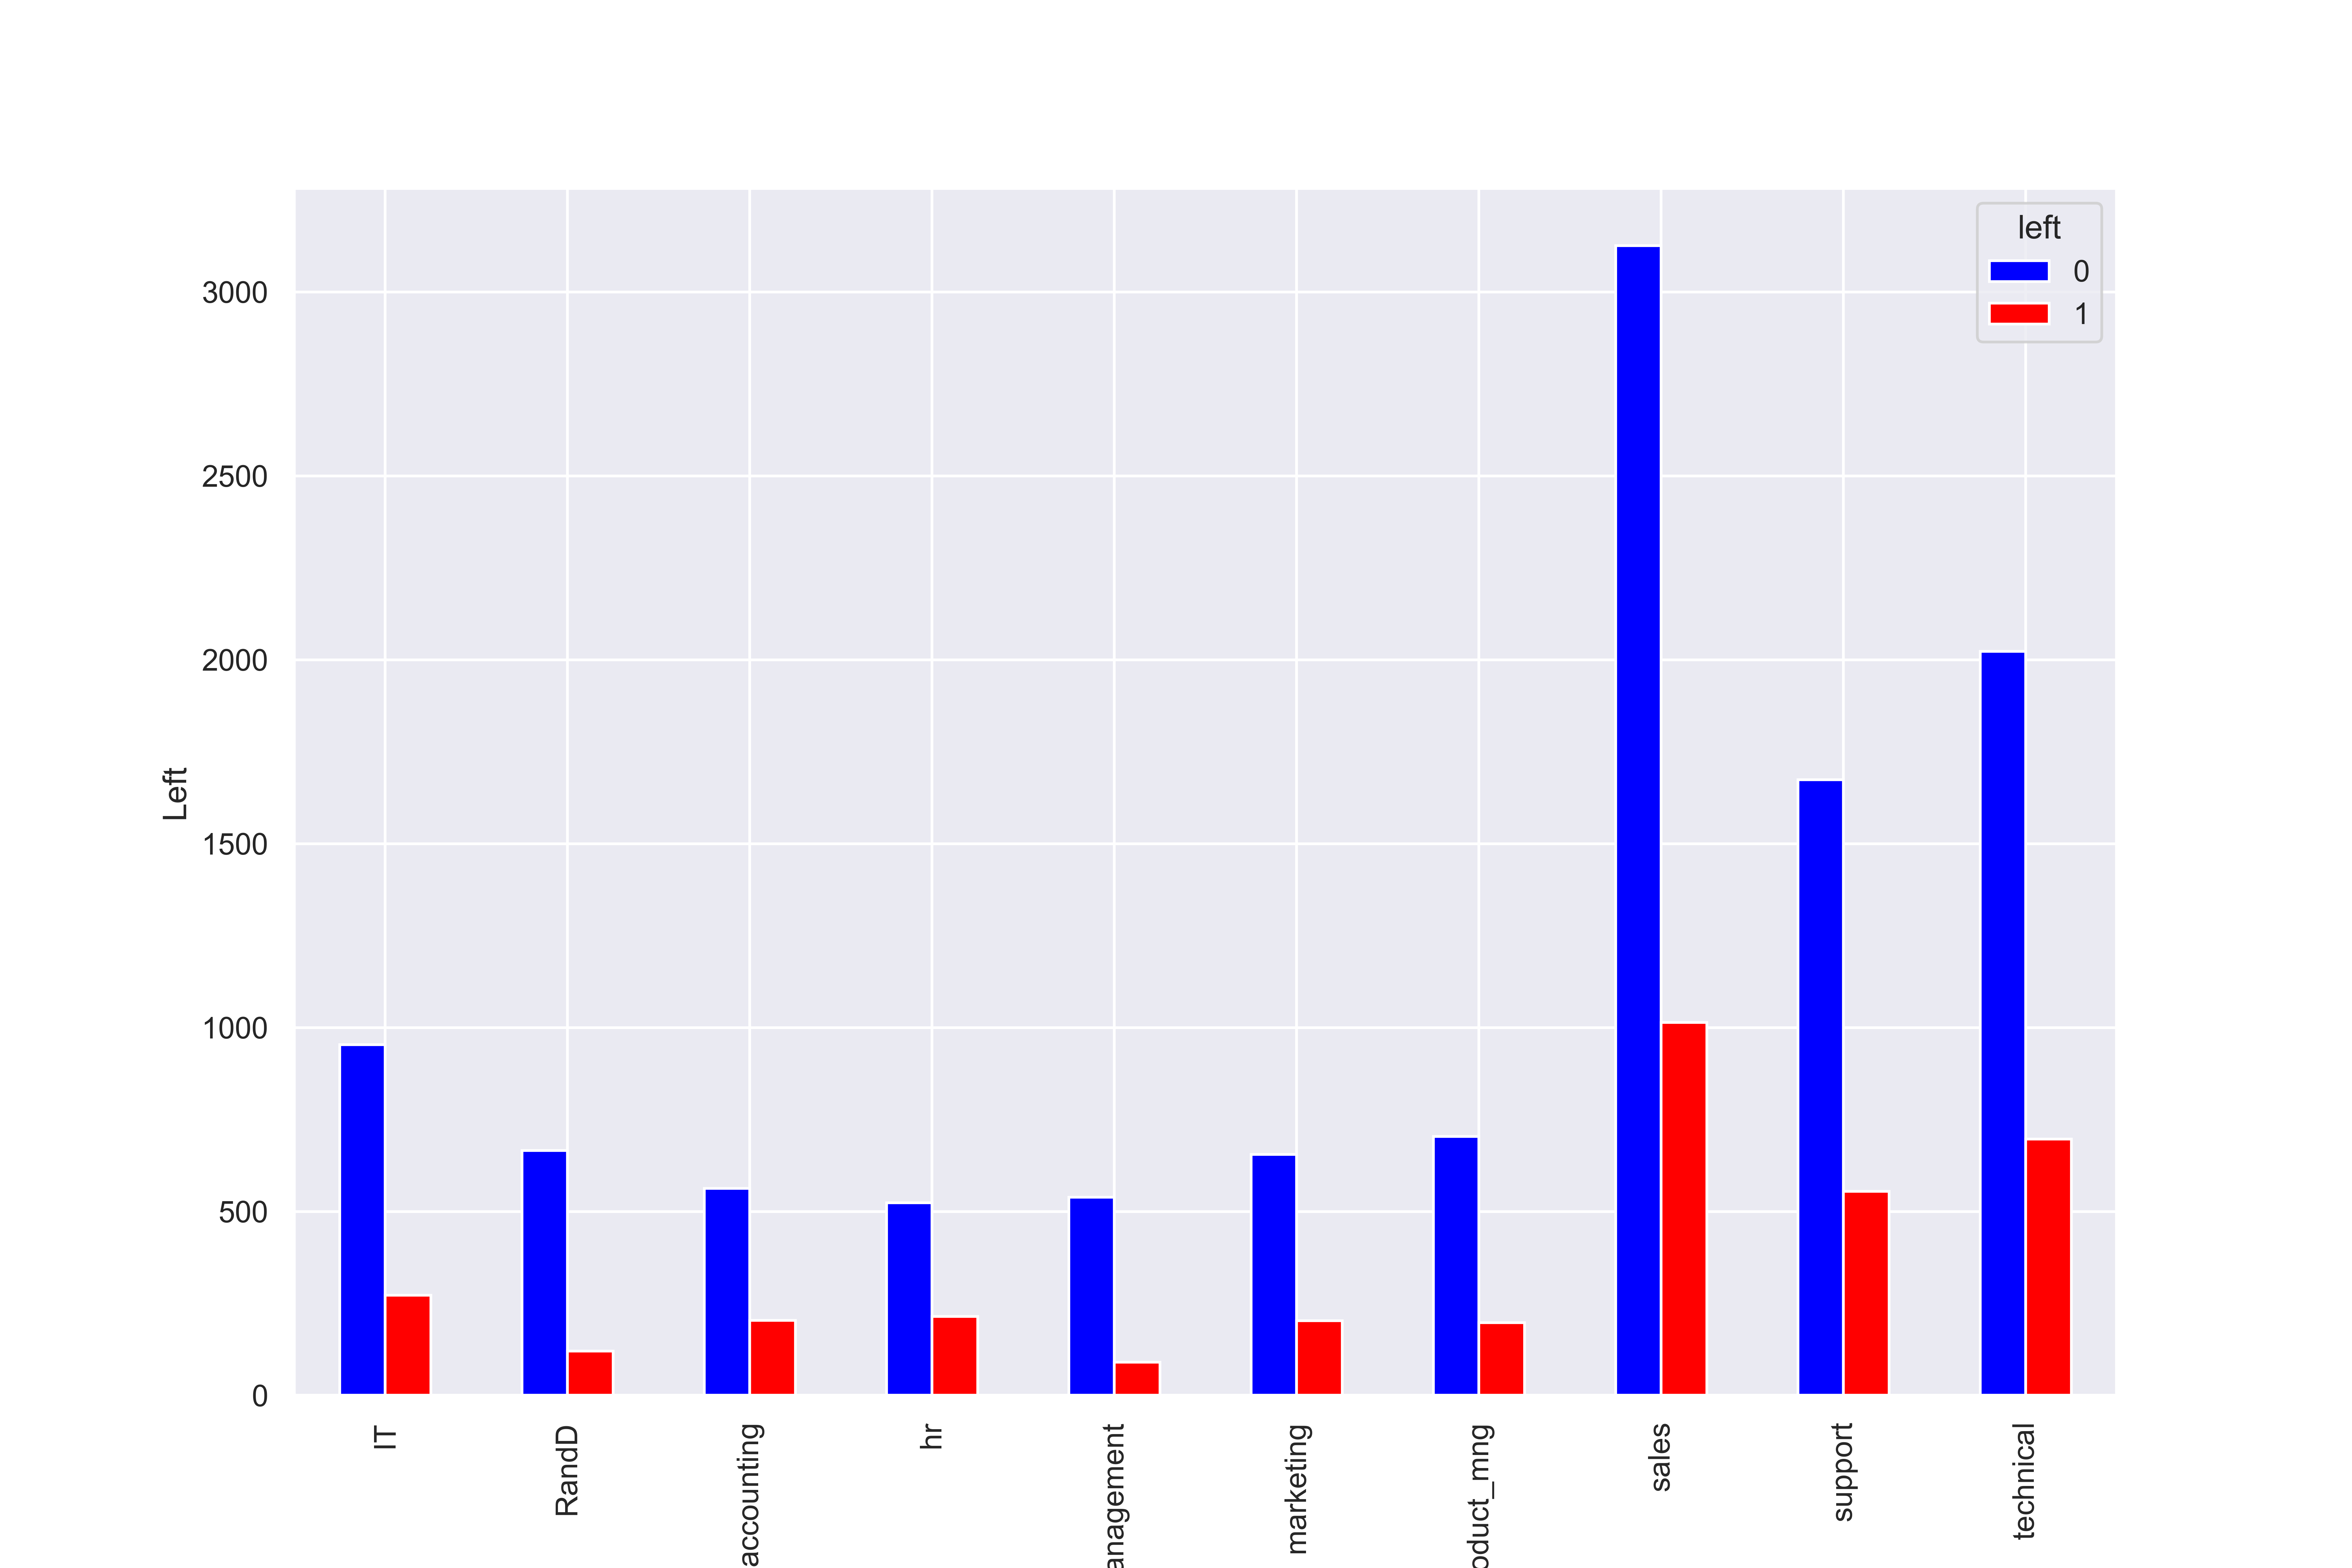

In [37]:
pd.crosstab(data.Department,data.left).plot(kind='bar',color=['blue','red'])
plt.xlabel('Department')
plt.ylabel('Left');

In [42]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [45]:
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

Facet grid

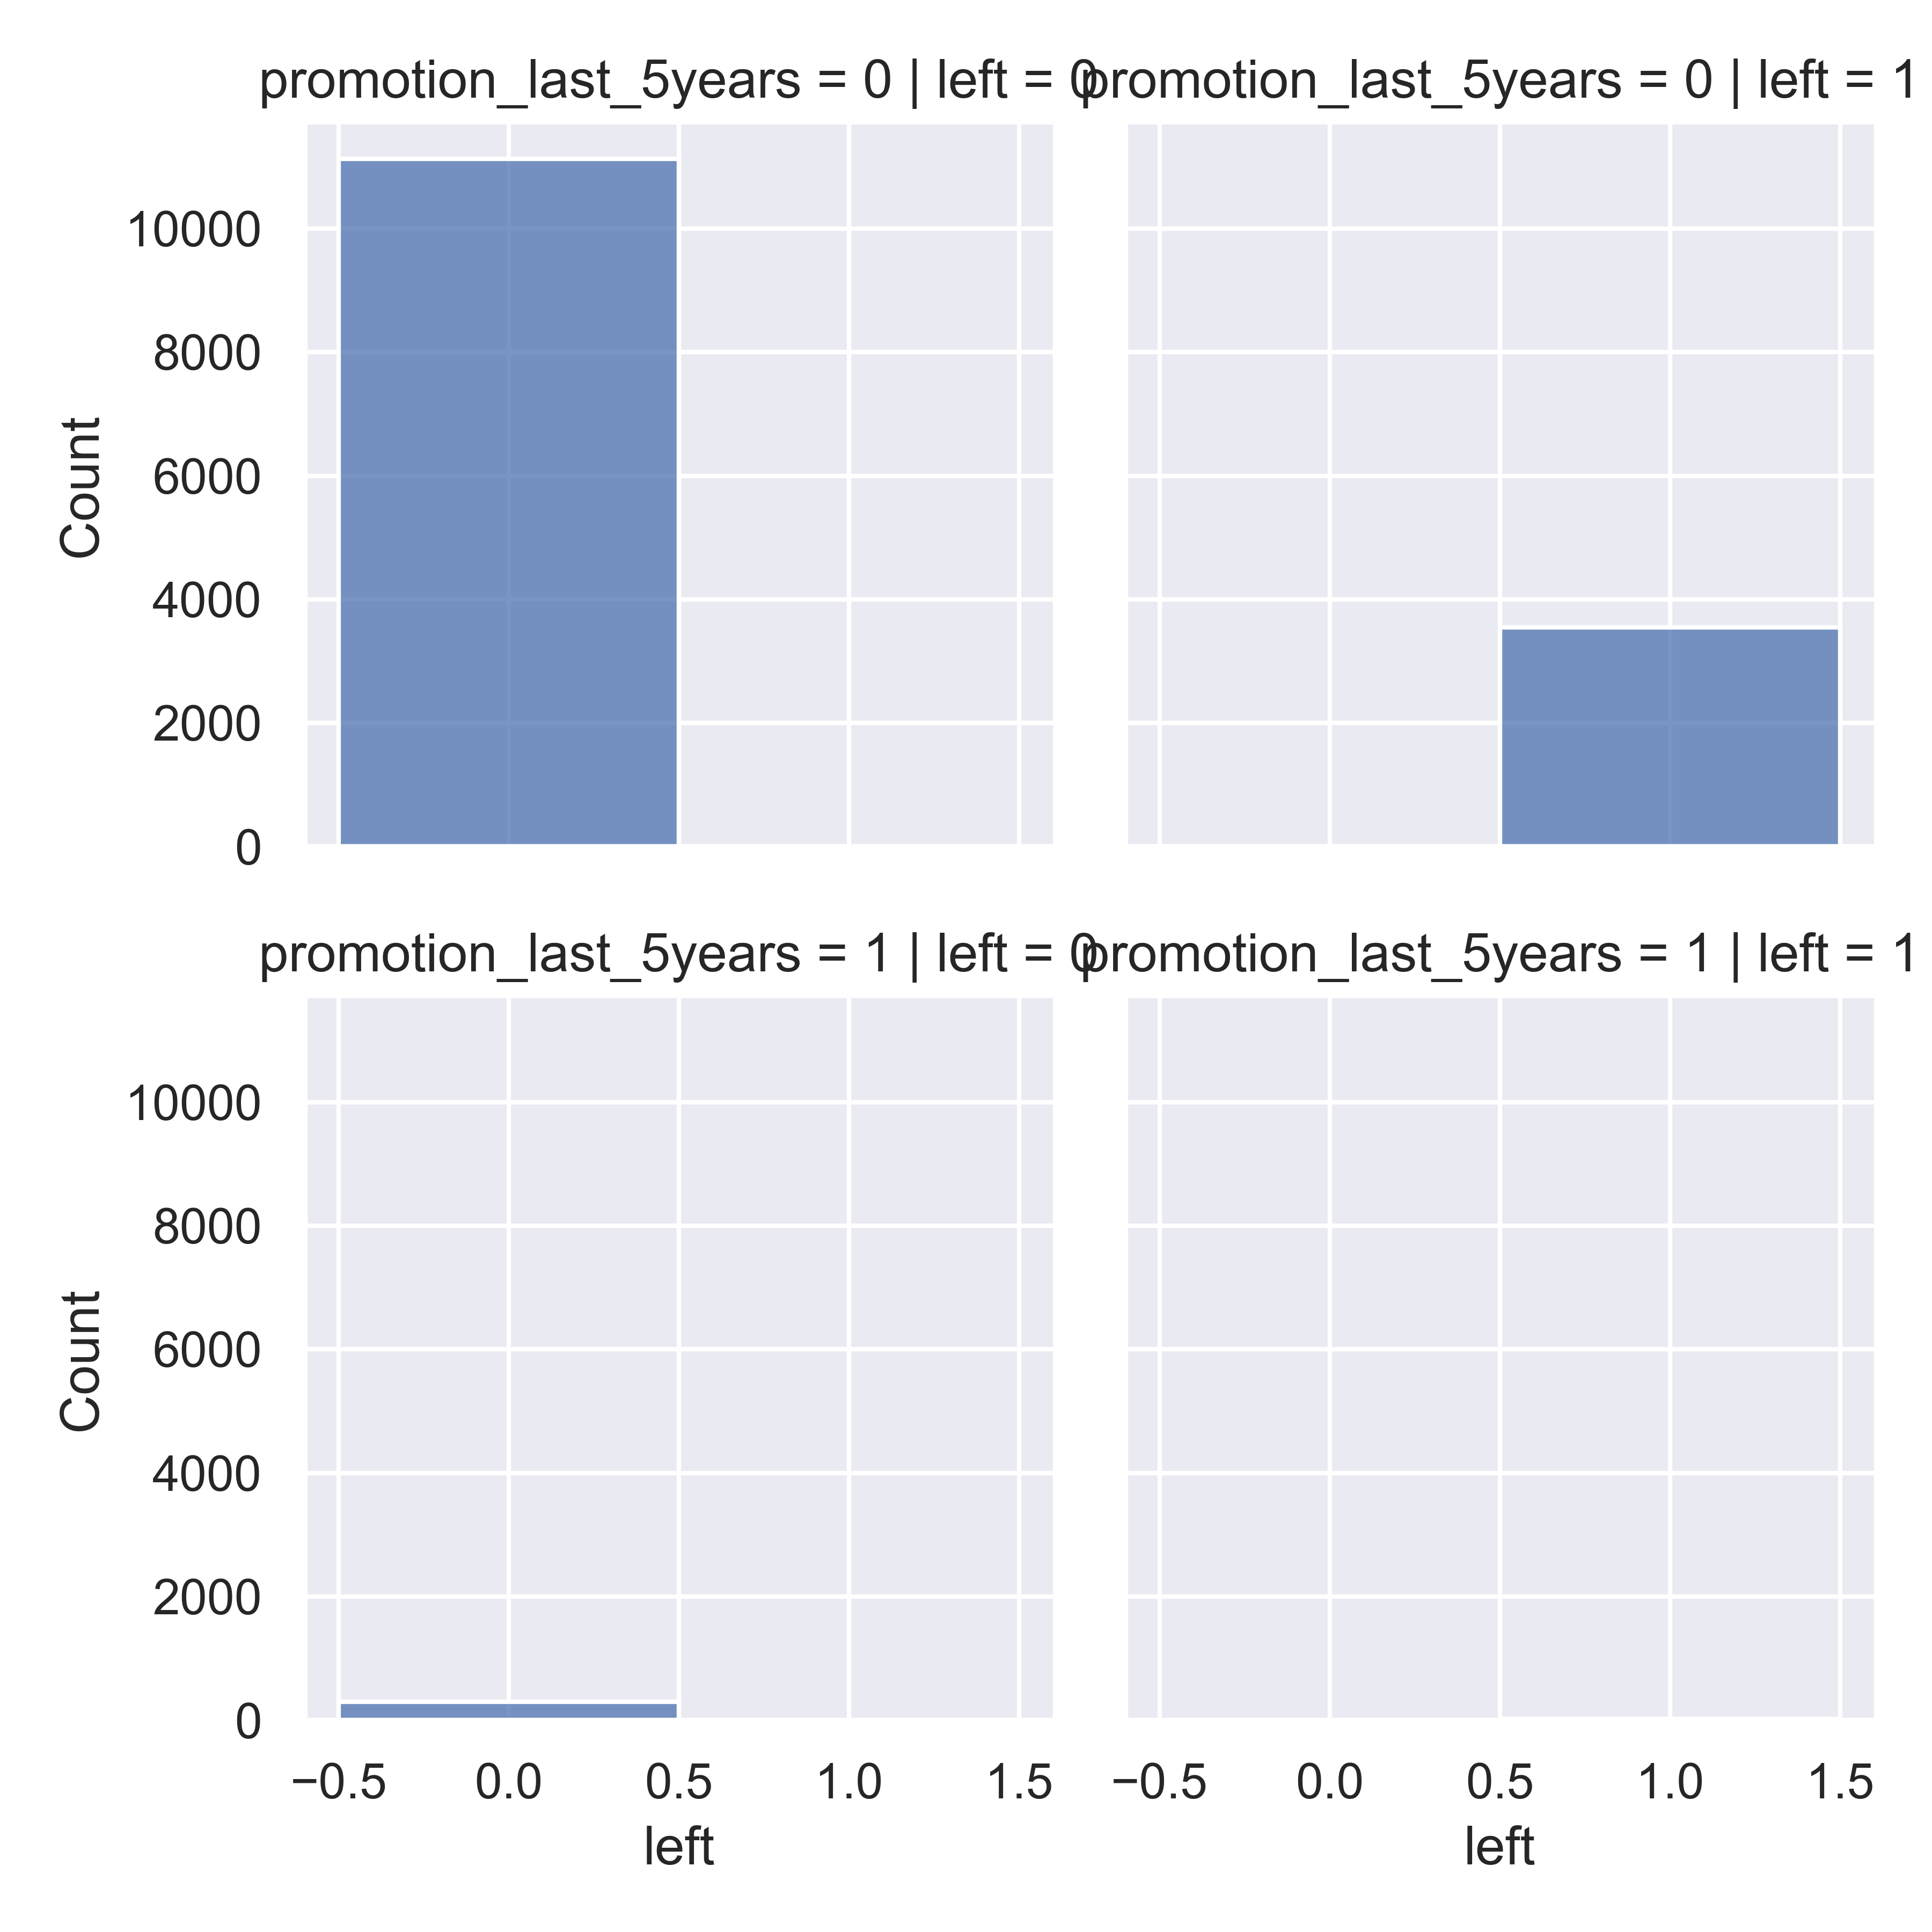

In [44]:
sns.FacetGrid(data,col='left',row='promotion_last_5years').map(sns.histplot,'left')